In [4]:
using StatsBase

In [5]:
include("betaSkeletons.jl")

plotDelaunay (generic function with 1 method)

In [6]:
using HDF5, JLD, Test, ProgressMeter, Pkg

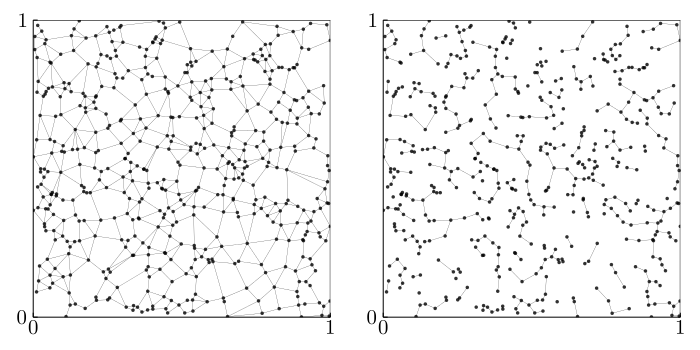

In [7]:
puntos, luna, circulo = betaSkeleton(1.2, 500)
p1 = plotBetaSkeleton(puntos, luna)
p2 = plotBetaSkeleton(puntos, circulo)
plot(p1, p2, layout = (1, 2), legend=false, size = (700, 350))

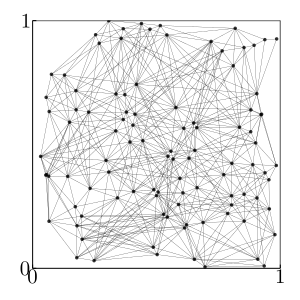

In [8]:
puntos, adeacencia = betaSkeletonV2(0.58, 100)
plotBetaSkeleton(puntos, adeacencia)

### Degree distribution for  $0<\beta_s < \infty$

This just works for $\beta_s\geq 1$. 

In [12]:
betas1to2 = exp10.(range(log10.(1), stop = log10.(2), length = 10))
dimensiones = collect(50:50:200) #vcat(collect(50:50:500), [1000, 2000, 5000, 10000]);
degDimsLunes = zeros(size(dimensiones)[1], size(betas1to2)[1])
degDimsCircles = zeros(size(dimensiones)[1], size(betas1to2)[1])
for (indxb, beta) in enumerate(betas1to2)
    for (indxn, nnodes) in enumerate(dimensiones)
        av_degreeLune = 0
        av_degreeCirculo = 0
        iteraciones = nnodes < 500 ? 5 : 5
        for i in 1:iteraciones
            nodos, lunes, circulos = betaSkeletonV2(beta, nnodes)
            av_degreeLune += mean(sum(lunes .!= 0, dims = 1) .- 1)
            av_degreeCirculo += mean(sum(circulos .!= 0, dims = 1) .- 1)
        end
        degDimsLunes[indxn, indxb] = av_degreeLune/iteraciones
        degDimsCircles[indxn, indxb] = av_degreeCirculo/iteraciones
    end
end

In [63]:
av_degreeLune = 0
av_degreeCirculo = 0
realizaciones = 100
for i in 1:realizaciones
    nodos, lunes, circulos = betaSkeletonV2(1.0, 10)
    av_degreeLune += mean(sum(lunes .!= 0, dims = 1) .- 1)
    av_degreeCirculo += mean(sum(circulos .!= 0, dims = 1) .- 1)
end


SystemError: SystemError: shm_open() failed for /jl001072pNwE4kG89E6uQ914uzTi: Too many open files

In [46]:
[av_degreeLune, av_degreeCirculo]./realizaciones

2-element Array{Float64,1}:
 2.643298969072164
 2.643298969072164

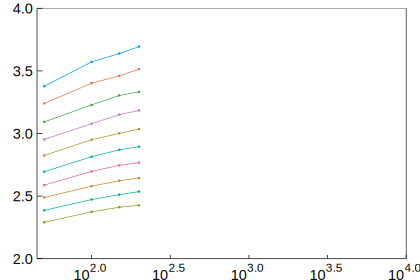

In [11]:
pdeg = plot(legend = false,xscale = :log10,
    legendfontsize = 12, fg_legend = :white,
    grid = false, axis = :on, framestyle=:box, xlim =(45,10000), ylim=(2,4),
    xtickfont = font(14, "sans-serif"), ytickfont = font(14, "sans-serif"),
    dpi=70, size = (600,400))
for i in 1:10
    plot!(dimensiones, degDimsLunes[:, i], m = (2, stroke(0)))
end
pdeg

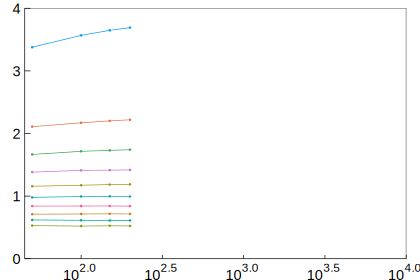

In [26]:
pdegc = plot(legend = false, xscale = :log10,
    legendfontsize = 12, fg_legend = :white,
    grid = false, axis = :on, framestyle=:box, xlim =(45,10000), ylim=(0.,4),
    xtickfont = font(14, "sans-serif"), ytickfont = font(14, "sans-serif"),
    dpi=70, size = (600,400))
for i in 1:10
    plot!(dimensiones, degDimsCircles[:, i], m = (2, stroke(0)))
end
pdegc

In [23]:
betas1to2big = exp10.(range(log10.(2), stop = log10.(2000), length = 10))
dimensiones =  collect(50:50:150) #vcat(collect(50:50:500), [1000, 2000, 5000, 10000]);
degDimsLunesbig = zeros(size(dimensiones)[1], size(betas1to2big)[1])
degDimsCirclesbig = zeros(size(dimensiones)[1], size(betas1to2big)[1])
for (indxb, beta) in enumerate(betas1to2big)
    for (indxn, nnodes) in enumerate(dimensiones)
        av_degreeLune = 0
        av_degreeCirculo = 0
        iteraciones = nnodes <= 500 ? 100 : 5
        for i in 1:iteraciones
            nodos, lunes, circulos = betaSkeletonV2(beta, nnodes)
            av_degreeLune += mean(sum(lunes .!= 0, dims = 1) .- 1)
            av_degreeCirculo += mean(sum(circulos .!= 0, dims = 1) .- 1)
        end
        degDimsLunesbig[indxn, indxb] = av_degreeLune/iteraciones
        degDimsCirclesbig[indxn, indxb] = av_degreeCirculo/iteraciones
    end
end

SystemError: SystemError: shm_open() failed for /jl000983ULLA18VIkkwTTc37juQK: Too many open files

In [ ]:
betas1to2big = exp10.(range(log10.(2), stop = log10.(2000), length = 10))
dimensiones = collect(50:50:500) #vcat(collect(50:50:500), [1000, 2000, 5000, 10000]);
degDimsLunesbig = zeros(size(dimensiones)[1], size(betas1to2big)[1])
degDimsCirclesbig = zeros(size(dimensiones)[1], size(betas1to2big)[1])

for (indxb, beta) in enumerate(betas1to2big)
    for (indxn, nnodes) in enumerate(dimensiones)
        av_degreeLune = 0
        av_degreeCirculo = 0
        iteraciones = nnodes <= 500 ? 500 : 2
        for i in 1:iteraciones
            nodos, lunes, circulos = betaSkeleton(beta, nnodes)
            #slunes = Symmetric(lunes)
            #scirculos = Symmetric(circulos)
            av_degreeLune += mean(sum(lunes .!= 0, dims = 1) .- 1)
            av_degreeCirculo += mean(sum(circulos .!= 0, dims = 1) .- 1)
        end
        degDimsLunesbig[indxn, indxb] = av_degreeLune/iteraciones
        degDimsCirclesbig[indxn, indxb] = av_degreeCirculo/iteraciones
    end
end

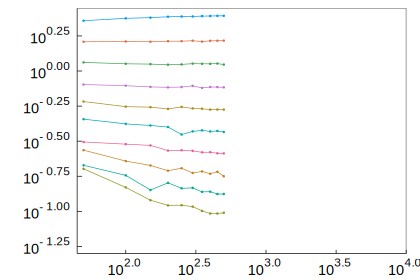

In [8]:
pdegbig = plot(legend = false, xscale = :log10, yscale = :log,
    legendfontsize = 12, fg_legend = :white,
    grid = false, axis = :on, framestyle=:box, xlim =(45,10000), ylim=(0.05,2.8),
    xtickfont = font(14, "sans-serif"), ytickfont = font(14, "sans-serif"),
    dpi=70, size = (600,400))
for i in 1:10
    plot!(dimensiones, degDimsLunesbig[:, i], m = (2, stroke(0)))
end
pdegbig

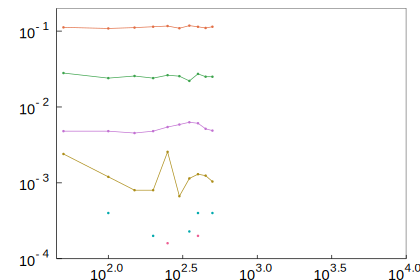

In [9]:
pdegbig = plot(legend = false, xscale = :log10,yscale = :log10,
    legendfontsize = 12, fg_legend = :white,
    grid = false, axis = :on, framestyle=:box, xlim =(45,10000), ylim=(0.0001,0.2),
    xtickfont = font(14, "sans-serif"), ytickfont = font(14, "sans-serif"),
    dpi=70, size = (600,400))
for i in 1:10
    plot!(dimensiones, degDimsCirclesbig[:, i], m = (2, stroke(0)))
end
pdegbig

In [28]:
degDimsCirclesbig

14×10 Array{Float64,2}:
 0.506     0.116     0.038      …  0.0          0.0    0.0     0.0
 0.559     0.113     0.027         0.0          0.0    0.0     0.0
 0.511333  0.122667  0.0253333     0.000666667  0.0    0.0     0.0
 0.529     0.1095    0.0255        0.0          0.0    0.0005  0.0
 0.5188    0.1084    0.0196        0.0          0.0    0.0     0.0
 0.506667  0.114     0.026      …  0.0          0.0    0.0     0.0
 0.507143  0.117143  0.0208571     0.0          0.0    0.0     0.0
 0.51175   0.113     0.026         0.00025      0.0    0.0     0.0
 0.524667  0.108222  0.0224444     0.0          0.0    0.0     0.0
 0.524     0.102     0.03          0.0          0.0    0.0     0.0
 0.506     0.108     0.023      …  0.0          0.001  0.0     0.0
 0.532     0.1075    0.0245        0.0          0.0    0.0     0.0
 0.5224    0.1064    0.0236        0.0          0.0    0.0     0.0
 0.5195    0.1056    0.0248        0.0          0.0    0.0     0.0

In [6]:
betas1to2small = exp10.(range(log10.(0.1), stop = log10.(0.9), length = 10))
dimensiones = collect(50:50:500) #vcat(collect(50:50:500), [1000, 2000, 5000, 10000]);
degDimsLunessmall = zeros(size(dimensiones)[1], size(betas1to2small)[1])
for (indxb, beta) in enumerate(betas1to2small)
    for (indxn, nnodes) in enumerate(dimensiones)
        av_degreeLune = 0
        av_degreeCirculo = 0
        iteraciones = nnodes < 500 ? 10 : 2
        for i in 1:iteraciones
            nodos, lunes = betaSkeleton(beta, nnodes)
            av_degreeLune += mean(sum(lunes .!= 0, dims = 1) .- 1)
        end
        degDimsLunessmall[indxn, indxb] = av_degreeLune/iteraciones
    end
end

In [7]:
degDimsLunessmall

10×10 Array{Float64,2}:
 31.132   28.296   25.152   21.64    …  13.128   10.324    7.936    5.408  
 44.87    39.134   33.292   27.654      14.962   11.69     8.934    5.956  
 52.5333  44.796   37.1067  30.564      16.0173  12.464    9.22     6.06933
 57.148   47.689   40.176   32.51       16.461   12.7      9.55     6.18   
 60.8448  50.6136  41.3016  33.5656     17.0     13.12     9.5808   6.3632 
 63.6193  52.3647  43.0147  34.7227  …  17.3127  13.266    9.82133  6.32333
 65.8137  53.4811  43.188   34.8457     17.4091  13.4691   9.85771  6.42229
 67.0245  54.836   44.303   35.58       17.6285  13.5245   9.9945   6.4345 
 68.5818  55.7538  44.8644  36.1587     17.8164  13.652   10.0324   6.45867
 70.104   57.624   46.16    36.984      17.776   13.724   10.062    6.47   

In [36]:
pdegs = plot(legend = false, xscale = :log10,
    legendfontsize = 12, fg_legend = :white,
    grid = false, axis = :on, framestyle=:box, xlim =(45,10000), #ylim=(0.,4),
    xtickfont = font(14, "sans-serif"), ytickfont = font(14, "sans-serif"),
    dpi=70, size = (600,400))
for i in 1:10
    plot!(dimensiones, degDimsLunessmall[:, i], m = (2, stroke(0)))
end
pdegs

UndefVarError: UndefVarError: degDimsLunessmall not defined

In [30]:
betasmall = exp10.(range(log10.(0.1), stop = log10.(0.9), length = 10))
betas1to2 = exp10.(range(log10.(1), stop = log10.(1.9), length = 10))
betasbig = exp10.(range(log10.(2), stop = log10.(2000), length = 10))
allbetas = vcat(betasmall, betas1to2, betasbig)

30-element Array{Float64,1}:
    0.1                
    0.12765180070092416
    0.16294982222188462
    0.2080083823051904 
    0.26552644562143807
    0.3389492891729259 
    0.4326748710922225 
    0.5523172641296245 
    0.7050429332435452 
    0.9                
    1.0                
    1.0739217108064016 
    1.1533078409413489 
    ⋮                  
    1.769216490253559  
    1.9                
    2.0                
    4.308869380063768  
    9.283177667225559  
   20.000000000000004  
   43.08869380063768   
   92.83177667225561   
  200.00000000000003   
  430.88693800637697   
  928.3177667225556    
 2000.0000000000002    

In [ ]:
function degreeDistribution(betas, dimensiones)
    degDimsLunes = zeros(size(dimensiones)[1], size(betas)[1])
    degDimsCircles = zeros(size(dimensiones)[1], size(betas)[1])
    
    for (indxb, beta) in enumerate(betas)
        for (indxn, nnodes) in enumerate(dimensiones)
            av_degreeLune = 0
            av_degreeCirculo = 0
            iteraciones = nnodes < 500 ? 500 : 5
            if beta >= 1
                for i in 1:iteraciones
                    nodos, lunes, circulos = betaSkeleton(beta, nnodes)
                    av_degreeLune += mean(sum(lunes .!= 0, dims = 1) .- 1)
                    av_degreeCirculo += mean(sum(circulos .!= 0, dims = 1) .- 1)
                end
                degDimsLunes[indxn, indxb] = av_degreeLune/iteraciones
                degDimsCircles[indxn, indxb] = av_degreeCirculo/iteraciones
            elseif beta < 1
                for i in 1:iteraciones
                    nodos, lunes = betaSkeleton(beta, nnodes)
                    av_degreeLune += mean(sum(lunes .!= 0, dims = 1) .- 1)
                end
                degDimsLunes[indxn, indxb] = av_degreeLune/iteraciones
            end
        end
    end
    degDimsLunes, degDimsCircles
end

In [6]:
betasmall = exp10.(range(log10.(0.1), stop = log10.(0.9), length = 10))
betas1to2 = exp10.(range(log10.(1), stop = log10.(1.9), length = 10))
betasbig = exp10.(range(log10.(2), stop = log10.(2000), length = 10))
allbetas = vcat(betasmall, betas1to2, betasbig)
dimensiones = vcat(collect(50:50:500), [1000, 2000, 5000, 10000]);

In [7]:
allbetas

30-element Array{Float64,1}:
    0.1                
    0.12765180070092416
    0.16294982222188462
    0.2080083823051904 
    0.26552644562143807
    0.3389492891729259 
    0.4326748710922225 
    0.5523172641296245 
    0.7050429332435452 
    0.9                
    1.0                
    1.0739217108064016 
    1.1533078409413489 
    ⋮                  
    1.769216490253559  
    1.9                
    2.0                
    4.308869380063768  
    9.283177667225559  
   20.000000000000004  
   43.08869380063768   
   92.83177667225561   
  200.00000000000003   
  430.88693800637697   
  928.3177667225556    
 2000.0000000000002    

In [8]:
dimensiones

14-element Array{Int64,1}:
    50
   100
   150
   200
   250
   300
   350
   400
   450
   500
  1000
  2000
  5000
 10000

In [11]:
function degreeDistribution(betas, dimensiones, realizaciones)
    file = h5open("degDistIter$(realizaciones).h5", "w")
    degDimsLunes = d_create(file,"degLunes",datatype(Float64), dataspace(size(dimensiones)[1], size(betas)[1]))
    degDimsCircles = d_create(file,"degCircles",datatype(Float64), dataspace(size(dimensiones)[1], size(betas)[1]))
    for (indxb, beta) in enumerate(betas)
        for (indxn, nnodes) in enumerate(dimensiones)
            av_degreeLune = 0
            av_degreeCirculo = 0
            iteraciones = nnodes <= 500 ? realizaciones : 5
            if beta >= 1
                for i in 1:iteraciones
                    nodos, lunes, circulos = betaSkeleton(beta, nnodes)
                    av_degreeLune += mean(sum(lunes .!= 0, dims = 1) .- 1)
                    av_degreeCirculo += mean(sum(circulos .!= 0, dims = 1) .- 1)
                end
                degDimsLunes[indxn, indxb] = av_degreeLune/iteraciones
                degDimsCircles[indxn, indxb] = av_degreeCirculo/iteraciones
            elseif beta < 1
                for i in 1:iteraciones
                    nodos, lunes = betaSkeleton(beta, nnodes)
                    av_degreeLune += mean(sum(lunes .!= 0, dims = 1) .- 1)
                end
                degDimsLunes[indxn, indxb] = av_degreeLune/iteraciones
                degDimsCircles[indxn, indxb] = av_degreeLune/iteraciones
            end
        end
    end
    flush(file)
    close(file)
end

degreeDistribution (generic function with 1 method)

In [6]:
betatest = [0,1,2,3,4]
dimentest = [0,1,2,3,4]

5-element Array{Int64,1}:
 0
 1
 2
 3
 4

In [7]:
size(betatest)

(5,)

In [8]:
betasmall = exp10.(range(log10.(0.1), stop = log10.(0.9), length = 10))
betas1to2 = exp10.(range(log10.(1), stop = log10.(1.9), length = 10))
betasbig = exp10.(range(log10.(2), stop = log10.(2000), length = 10))
allbetas = vcat(betasmall, betas1to2, betasbig)
dimensiones = vcat(collect(50:50:500), [1000, 2000, 5000, 10000]);

In [13]:
function degreetest2(betas, dimensiones, realizaciones)
    file = h5open("degDistIter$(realizaciones).h5", "w")
    degDimsLunes = d_create(file,"degLunes",datatype(Float64), dataspace(size(dimensiones)[1], size(betas)[1]))
    for (indxb, beta) in enumerate(betas)
        for (indxn, nnodes) in enumerate(dimensiones)
            conteo = 0
            if beta >= 1
                for i in 1:realizaciones
                    nodos, lunes, circulos = betaSkeleton(1.0, 10)
                    conteo += sum(lunes)
                    finalize(lunes)
                    finalize(circulos)
                end
                degDimsLunes[indxn, indxb] = 1.0*conteo
            elseif beta < 1
                for i in 1:realizaciones
                    nodos, lunes, circulos = betaSkeleton(1.0, 10)
                    conteo += sum(lunes)
                    finalize(lunes)
                    finalize(circulos)
                end
                degDimsLunes[indxn, indxb] = 0.5*conteo
            end
            GC.gc()
        end
    end
    flush(file)
    close(file)
end

degreetest2 (generic function with 1 method)

In [26]:
function degreetest0(betas, dimensiones, realizaciones)
    file = h5open("degDistIter$(realizaciones).h5", "w")
    degDimsLunes = d_create(file,"degLunes",datatype(Float64), dataspace(size(dimensiones)[1], size(betas)[1]))
    for (indxb, beta) in enumerate(betas)
        for (indxn, nnodes) in enumerate(dimensiones)
            conteo = 0
            if beta >= 1
                for i in 1:realizaciones
                    nodos, lunes, circulos = betaSkeleton(1.0, 10)
                    conteo += sum(lunes)
                    finalize(lunes)
                    finalize(circulos)
                end
                degDimsLunes[indxn, indxb] = 1.0*conteo
            elseif beta < 1
                for i in 1:realizaciones
                    nodos, lunes, circulos = betaSkeleton(1.0, 10)
                    conteo += sum(lunes)
                    finalize(lunes)
                    finalize(circulos)
                end
                degDimsLunes[indxn, indxb] = 0.5*conteo
            end
            GC.gc()
        end
    end
    flush(file)
    close(file)
end

degreetest0 (generic function with 1 method)

In [27]:
degreetest0(allbetas, dimensiones, 2)

In [28]:
@time degreetest0(allbetas, dimensiones, 3)

 64.913620 seconds (1.00 M allocations: 60.734 MiB, 90.38% gc time)


In [29]:
@time degreetest0(allbetas, dimensiones, 10)

 75.502969 seconds (3.27 M allocations: 198.472 MiB, 75.13% gc time)


In [30]:
@time degreetest0(allbetas, dimensiones, 100)

233.967166 seconds (32.55 M allocations: 1.923 GiB, 23.58% gc time)


In [42]:
GC.gc()

In [43]:
@time degreetest0(allbetas, dimensiones, 90)

232.241824 seconds (29.35 M allocations: 1.732 GiB, 25.48% gc time)


In [44]:
function degreetest100(betas, dimensiones, realizaciones)
    file = h5open("degDistIter$(realizaciones).h5", "w")
    degDimsLunes = d_create(file,"degLunes",datatype(Float64), dataspace(size(dimensiones)[1], size(betas)[1]))
    for (indxb, beta) in enumerate(betas)
        for (indxn, nnodes) in enumerate(dimensiones)
            conteo = 0
            if beta >= 1
                for i in 1:realizaciones
                    nodos, lunes, circulos = betaSkeleton(1.0, 100)
                    conteo += sum(lunes)
                    finalize(lunes)
                    finalize(circulos)
                end
                degDimsLunes[indxn, indxb] = 1.0*conteo
            elseif beta < 1
                for i in 1:realizaciones
                    nodos, lunes, circulos = betaSkeleton(1.0, 100)
                    conteo += sum(lunes)
                    finalize(lunes)
                    finalize(circulos)
                end
                degDimsLunes[indxn, indxb] = 0.5*conteo
            end
            GC.gc()
        end
    end
    flush(file)
    close(file)
end

degreetest100 (generic function with 1 method)

In [45]:
degreetest100(allbetas, dimensiones, 16)

In [46]:
@time degreetest100(allbetas, dimensiones, 95)

1024.578833 seconds (31.99 M allocations: 8.711 GiB, 5.47% gc time)


In [52]:
@time readtest = h5read("degDistIter95.h5", "degLunes")

  0.001309 seconds (31 allocations: 4.766 KiB)


14×30 Array{Float64,2}:
  -82.8648    -6.07793     52.5279  …    38.2638    340.313     -20.7492 
  -17.5351    45.2708    -251.384        13.0487    122.875      43.7291 
   62.1469  -116.519      237.772      -267.871       8.58365  -277.087  
   79.7905   -71.604      -55.0293      344.182    -398.244     243.062  
  -24.9542   -73.6541     -56.0457      342.101      42.9089   -202.783  
  136.65       0.500537   -24.5377  …  -205.859     119.445     155.92   
   79.0477    20.756      -16.1274       15.5394   -192.281      -8.06186
  -61.4438   -68.7623      13.7252      312.671     -64.8606    -24.5014 
  -43.4077    83.2088     -68.1839       44.6421     81.4111   -125.85   
  -39.6975   -93.0744      45.7863      178.727      96.9242    319.592  
 -115.479     58.8445      67.3217  …  -184.361    -339.963      98.9705 
  -48.9699   117.466       79.4909     -411.845    -165.433     200.996  
  -27.4732   -52.5114      28.2402      145.906     316.182    -265.078  
 -190.6      -

In [156]:
@everywhere GC.gc()
function testiter(dim, n_iter)
    av_degreeLune = 0
    for i in 1:n_iter
        nodos, lunes = betaSkeleton(0.9, dim)
        av_degreeLune += mean(sum(lunes .!= 0, dims = 1) .- 1)
        #sleep(0.1)
    end
    #GC.gc()
end

testiter (generic function with 1 method)

In [159]:
testiter(10, 50)

In [164]:
@time testiter(10, 50)

SystemError: SystemError: shm_open() failed for /jl000841FzoTRUcMqxvhMCglh8In: Too many open files

In [50]:
size(allbetas)

(30,)

In [51]:
size(dimensiones)

(14,)

In [ ]:
dimensiones2 = vcat(collect(50:50:500)

In [ ]:
degreeDistribution(allbetas, dimensiones, 5)

In [ ]:
degreeDistribution(allbetas, dimensiones, 50)

In [ ]:
degreeDistribution(allbetas, dimensiones, 51)

In [ ]:
degreeDistribution(allbetas, dimensiones, 49)

In [ ]:
degreeDistribution(allbetas, dimensiones, 52)

In [ ]:
degreeDistribution(allbetas, dimensiones, 48)

In [ ]:
degreeDistribution(allbetas, dimensiones, 53)

In [ ]:
degreeDistribution(allbetas, dimensiones, 47)

In [ ]:
degreeDistribution(allbetas, dimensiones, 54)

In [ ]:
degreeDistribution(allbetas, dimensiones, 46)

In [ ]:
degreeDistribution(allbetas, dimensiones, 55)

In [12]:
?GC.gc

```
GC.gc()
```

Perform garbage collection.

!!! warning
    Excessive use will likely lead to poor performance.

